#### CS5691 Assignment 1 - Question 2 - Clustering

##### Submitted by: Vennapareddy Abhigna, Roll Number: ME19B059

### (2) i. Write a piece of code to run the algorithm studied in class for the K-means problem with k = 4 . Try 5 different random initialization and plot the error function w.r.t iterations in each case. In each case, plot the clusters obtained in different colors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import random
from scipy.spatial import Voronoi, voronoi_plot_2d

In [2]:
df=pd.read_csv('Dataset.csv',header=None)
df.columns=['x','y']
shape=df.shape
n=shape[0]
d=shape[1]
df

,x,y
0,0.14300,0.98493
1,-0.30467,0.98562
2,0.46625,-0.84003
3,0.94847,0.37222
4,-0.96871,-0.26697
...,...,...
995,4.48210,-7.40030
996,-3.49630,8.63860
997,6.10620,-5.98640
998,-7.40940,-5.52050


Text(0.5, 1.0, 'Data Points')

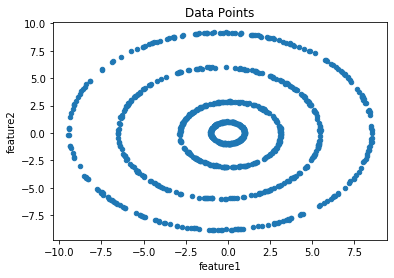

In [3]:
df.plot(x ='x', y='y', kind = 'scatter')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('Data Points')

In [4]:
data=df.to_numpy()
data

array([[ 0.143  ,  0.98493],
       [-0.30467,  0.98562],
       [ 0.46625, -0.84003],
       ...,
       [ 6.1062 , -5.9864 ],
       [-7.4094 , -5.5205 ],
       [-0.12948, -8.8036 ]])

In [5]:
clusters = 4

In [6]:
def assumemean(data,datapointrow):
    mean = []
    mean.append(list(data[datapointrow]))
    for k in range(1,clusters):
        max_d = []
        for i in range(0,len(data)):
            min_d = []
            for j in range(0,len(mean)):
                min_d.append(np.linalg.norm(data[i]-np.array(mean[j])))
            max_d.append(min(min_d))
        mean.append(list(np.array((data[max_d.index(max(max_d))]))))
        
    return mean

In [7]:
def cluster(data,mean):
    error=0
    z=[]
    for i in range(len(data)):
        dis = []
        for j in range(len(mean)):
            dis.append((np.linalg.norm(data[i]-np.array(mean[j])))**2)
        z.append(dis.index(min(dis))+1)
        error=error+min(dis)
    return z, error

In [8]:
def newmean(z,data,clusters):
    mean_new = []
    k=1
    for j in range(clusters):
        sum_data=np.zeros(data.shape[1])
        n=0
        for i in range(len(data)):
            if z[i]==k:
                sum_data=sum_data+data[i]
                n=n+1
        mean_new.append(list(sum_data/n))
        k=k+1
    return mean_new

In [9]:
def final(data,mean):
    errorlist=[]
    z1=cluster(data,mean)[0]
    err=cluster(data,mean)[1]
    errorlist.append(err)
    m=newmean(z1,data,clusters)
    z2=cluster(data,m)[0]
    err=cluster(data,m)[1]
    errorlist.append(err)
    iterations=2
    while (z1!=z2):
        m=newmean(z2,data,clusters)
        z1=z2
        z2=cluster(data,m)[0]
        err=cluster(data,m)[1]
        errorlist.append(err)
        iterations=iterations+1
    number_of_iterations = iterations
    return number_of_iterations,z2,m,errorlist

In [10]:
def plotting(data,z_final,clusters,mean_final):
    colour=['green','blue','magenta','red','orange']
    f=1
    for j in range(clusters):
        for i in range(len(data)):
            if z_final[i]==f:
                plt.scatter(data[i][0],data[i][1],color=colour[f-1])
        f=f+1
    plt.scatter(mean_final[:,0],mean_final[:,1],color='brown',label='mean points')
    plt.xlabel('feature1')
    plt.ylabel('feature2')
    plt.title('Clustering the dataset: Each colour corresponds to different cluster')
    plt.legend()

#### Initialization 1: Assuming first mean as 200th datapoint from dataset.

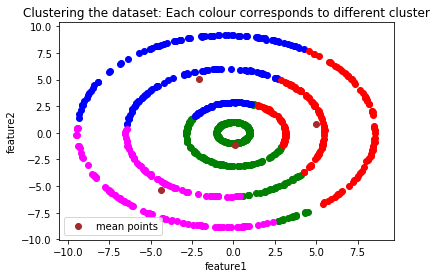

In [11]:
mean_first_1=assumemean(data,199)
iter_to_converge_1=final(data,mean_first_1)[0]
z_final_1=final(data,mean_first_1)[1]
mean_final_1=np.array(final(data,mean_first_1)[2])
error_list_1=final(data,mean_first_1)[3]
plotting(data,z_final_1,clusters,mean_final_1)

Text(0, 0.5, 'Error')

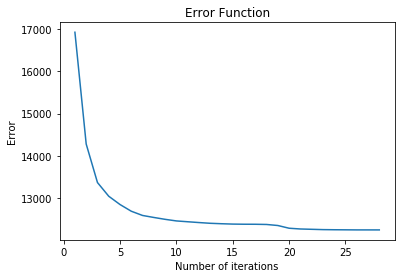

In [12]:
it1 = [j for j in range(1,len(error_list_1)+1)]
plt.plot(it1,error_list_1)
plt.title('Error Function')
plt.xlabel('Number of iterations')
plt.ylabel('Error')

#### Initialization 2: Assuming first mean as 400th datapoint from dataset.

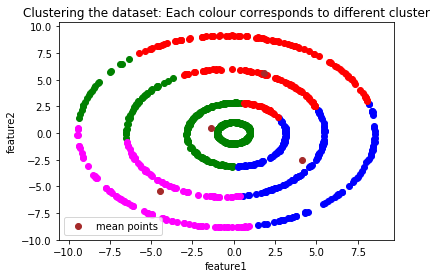

In [13]:
mean_first_2=assumemean(data,399)
iter_to_converge_2=final(data,mean_first_2)[0]
z_final_2=final(data,mean_first_2)[1]
mean_final_2=np.array(final(data,mean_first_2)[2])
error_list_2=final(data,mean_first_2)[3]
plotting(data,z_final_2,clusters,mean_final_2)

Text(0, 0.5, 'Error')

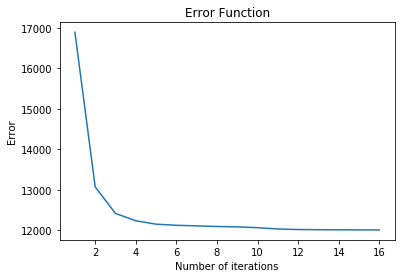

In [14]:
it2 = [j for j in range(1,len(error_list_2)+1)]
plt.plot(it2,error_list_2)
plt.title('Error Function')
plt.xlabel('Number of iterations')
plt.ylabel('Error')

#### Initialization 3: Assuming first mean as 600th datapoint from dataset.

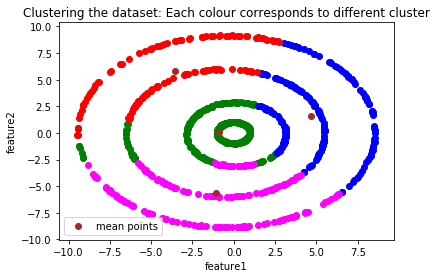

In [15]:
mean_first_3=assumemean(data,599)
iter_to_converge_3=final(data,mean_first_3)[0]
z_final_3=final(data,mean_first_3)[1]
mean_final_3=np.array(final(data,mean_first_3)[2])
error_list_3=final(data,mean_first_3)[3]
plotting(data,z_final_3,clusters,mean_final_3)

Text(0, 0.5, 'Error')

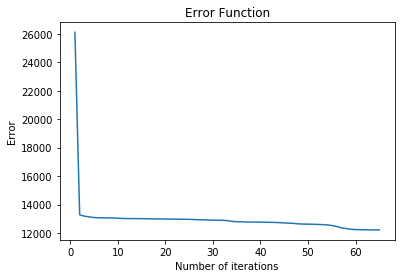

In [16]:
it3 = [j for j in range(1,len(error_list_3)+1)]
plt.plot(it3,error_list_3)
plt.title('Error Function')
plt.xlabel('Number of iterations')
plt.ylabel('Error')

#### Initialization 4: Assuming first mean as 800th datapoint from dataset.

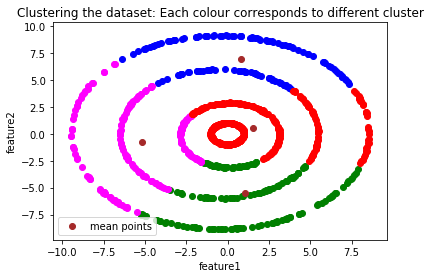

In [17]:
mean_first_4=assumemean(data,799)
iter_to_converge_4=final(data,mean_first_4)[0]
z_final_4=final(data,mean_first_4)[1]
mean_final_4=np.array(final(data,mean_first_4)[2])
error_list_4=final(data,mean_first_4)[3]
plotting(data,z_final_4,clusters,mean_final_4)

Text(0, 0.5, 'Error')

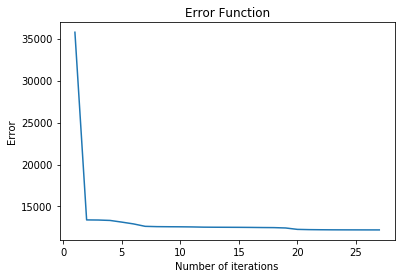

In [18]:
it4 = [j for j in range(1,len(error_list_4)+1)]
plt.plot(it4,error_list_4)
plt.title('Error Function')
plt.xlabel('Number of iterations')
plt.ylabel('Error')

#### Initialization 5: Assuming first mean as 910th datapoint from dataset.

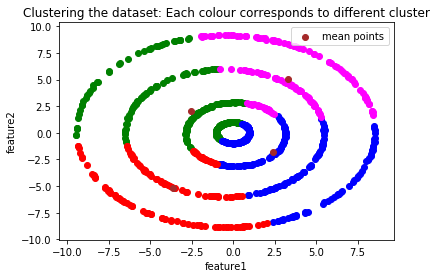

In [19]:
mean_first_5=assumemean(data,909)
iter_to_converge_5=final(data,mean_first_5)[0]
z_final_5=final(data,mean_first_5)[1]
mean_final_5=np.array(final(data,mean_first_5)[2])
error_list_5=final(data,mean_first_5)[3]
plotting(data,z_final_5,clusters,mean_final_5)

Text(0, 0.5, 'Error')

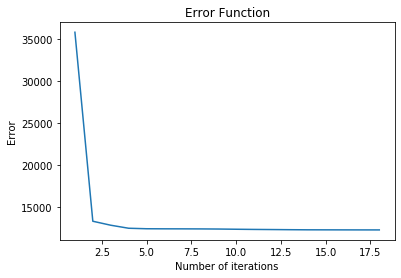

In [20]:
it5 = [j for j in range(1,len(error_list_5)+1)]
plt.plot(it5,error_list_5)
plt.title('Error Function')
plt.xlabel('Number of iterations')
plt.ylabel('Error')

### (2) ii. Fix a random initialization. For K = {2, 3, 4, 5}, obtain cluster centers according to K-means algorithm using the fixed initialization. For each value of K, plot the Voronoi regions associated to each cluster center. (You can assume the minimum and maximum value in the data-set to be the range for each component of R2 ).

In [21]:
K_num = [2,3,4,5]

In [22]:
def final_rand(data,clusters,z_rand):
    z1=z_rand
    m=newmean(z1,data,clusters)
    z2=cluster(data,m)[0]
    iterations=0
    while (z1!=z2):
        m=newmean(z2,data,clusters)
        z1=z2
        z2=cluster(data,m)[0]
        iterations=iterations+1
    number_of_iterations = iterations-1
    return number_of_iterations,z2,m

In [23]:
iter_to_converge_rand=[]
z_final_rand=[]
mean_final_rand=[]
for i in range(0,len(K_num)):
    np.random.seed(10)
    z_rand = list(np.random.randint(low=1, high=K_num[i]+1, size=1000))
    iter_to_converge_rand.append(final_rand(data,K_num[i],z_rand)[0])
    z_final_rand.append(final_rand(data,K_num[i],z_rand)[1])
    mean_final_rand.append(np.array(final_rand(data,K_num[i],z_rand)[2]))

#### For K=2

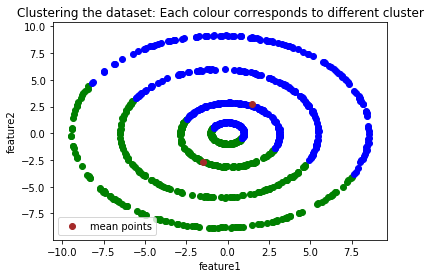

In [24]:
plotting(data,z_final_rand[0],K_num[0],mean_final_rand[0])

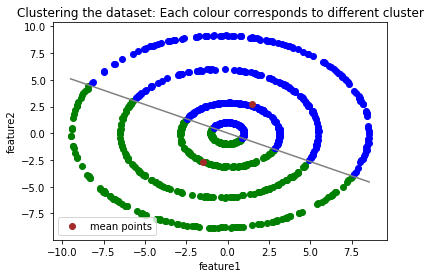

In [25]:
mu=sum(mean_final_rand[0])/2
mi=(mean_final_rand[0][1][1]-mean_final_rand[0][0][1])/(mean_final_rand[0][1][0]-mean_final_rand[0][0][0])
b=mu[1]-((-1/mi)*mu[0])
x1=np.linspace(min(data[:,0]),max(data[:,0]),100)
y1=(-1/mi)*x1 + b
plotting(data,z_final_rand[0],K_num[0],mean_final_rand[0])
plt.plot(x1,y1, color='grey')

vor=Voronoi(mean_final_rand[0])
figure = voronoi_plot_2d(vor)
plotting(data,z_final_rand[0],K_num[0],mean_final_rand[0])
plt.xlim(-10,10)
plt.ylim(-10,10)

#### For K=3

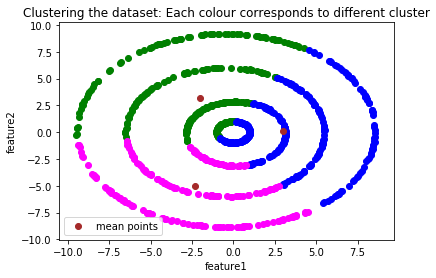

In [26]:
plotting(data,z_final_rand[1],K_num[1],mean_final_rand[1])

(-10, 10)

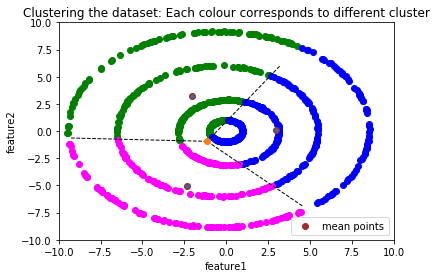

In [27]:
vor=Voronoi(mean_final_rand[1])
figure = voronoi_plot_2d(vor)
plotting(data,z_final_rand[1],K_num[1],mean_final_rand[1])
plt.xlim(-10,10)
plt.ylim(-10,10)

#### For K=4

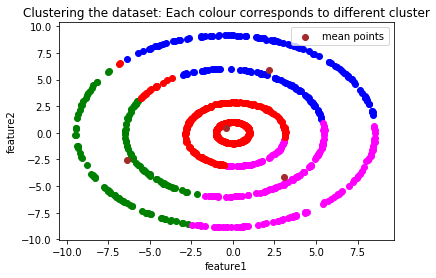

In [28]:
plotting(data,z_final_rand[2],K_num[2],mean_final_rand[2])

(-10, 10)

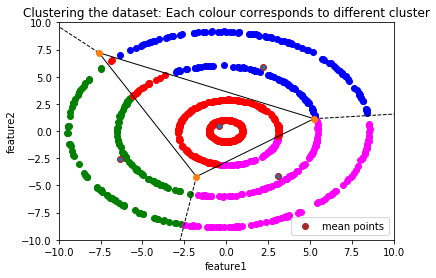

In [29]:
vor=Voronoi(mean_final_rand[2])
figure = voronoi_plot_2d(vor)
plotting(data,z_final_rand[2],K_num[2],mean_final_rand[2])
plt.xlim(-10,10)
plt.ylim(-10,10)

#### For K=5

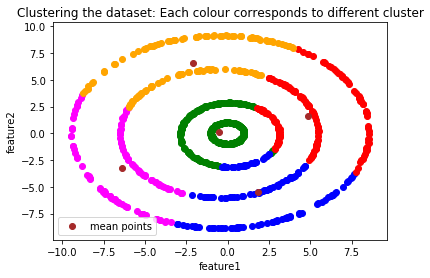

In [30]:
plotting(data,z_final_rand[3],K_num[3],mean_final_rand[3])

(-10, 10)

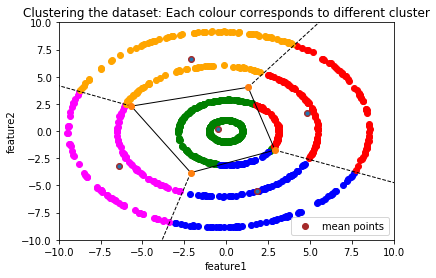

In [31]:
vor=Voronoi(mean_final_rand[3])
figure = voronoi_plot_2d(vor)
plotting(data,z_final_rand[3],K_num[3],mean_final_rand[3])
plt.xlim(-10,10)
plt.ylim(-10,10)

### (2) iii. Run the spectral clustering algorithm (spectral relaxation of K-means using Kernel PCA) k = 4. Choose an appropriate kernel for this data-set and plot the clusters obtained in different colors. Explain your choice of kernel based on the output you obtain.


In [32]:
sigma=3.8
K_rbf=np.empty([1000,1000])
for i in range(n):
    for j in range(n):
        K_rbf[i][j]=math.exp(-(np.matmul((data[i,:]-data[j,:]),(data[i,:]-data[j,:])))/(2*sigma*sigma))

In_rbf=np.empty([1000,1000])
In_rbf.fill(1/1000)

Kc_rbf=K_rbf-np.matmul(In_rbf,K_rbf)-np.matmul(K_rbf,In_rbf)+np.matmul(np.matmul(In_rbf,K_rbf),In_rbf)

In [33]:
eigenvalues_kc_rbf, eigenvectors_kc_rbf = np.linalg.eig(Kc_rbf)

s_kc_rbf = eigenvalues_kc_rbf.argsort()[::-1]   
eigenvalues_kc_rbf = eigenvalues_kc_rbf[s_kc_rbf].real
eigenvectors_kc_rbf = eigenvectors_kc_rbf[:,s_kc_rbf].real

In [34]:
rounds = [j for j in range(1,len(eigenvalues_kc_rbf)+1)]

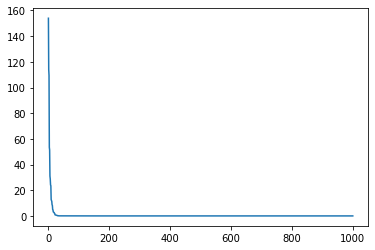

In [35]:
plt.plot(rounds,eigenvalues_kc_rbf)

In [36]:
den=sum(eigenvalues_kc_rbf)
u=1
q=eigenvalues_kc_rbf[u-1]/den
while q<0.95:
    u=u+1
    q=q+(eigenvalues_kc_rbf[u-1]/den)
u

14

In [37]:
H_mat = np.empty([n,u])
for i in range(u):
    H_mat[:,i] = eigenvectors_kc_rbf[:,i]
H_mat

array([[-0.04095531,  0.01538414, -0.0038871 , ..., -0.00585581,
         0.01274853,  0.00121507],
       [-0.04114641,  0.01246735, -0.01214376, ..., -0.00781122,
         0.00819313,  0.00437536],
       [-0.03892804, -0.01485737,  0.01446206, ..., -0.01340543,
         0.00490826,  0.00508256],
       ...,
       [ 0.03765715, -0.01728743,  0.03596299, ..., -0.04654793,
         0.05229398, -0.09116513],
       [ 0.04264909, -0.02844205, -0.02642321, ..., -0.0528011 ,
        -0.01536316,  0.03812551],
       [ 0.04239092, -0.03889048,  0.00820119, ...,  0.05382599,
        -0.03055507, -0.00275643]])

In [38]:
H2 = H_mat*H_mat
H = np.empty([n,u])
for i in range(n):
    sq=sum(H2[i,:])
    H[i,:] = H_mat[i,:]/np.power(sq,0.5)

##### lloyds with assumed means

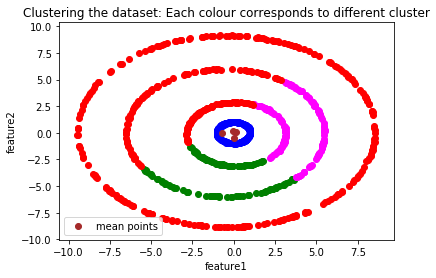

In [39]:
mean_first_rbf=assumemean(H,700)
iter_to_converge_rbf=final(H,mean_first_rbf)[0]
z_final_rbf=final(H,mean_first_rbf)[1]
mean_final_rbf=np.array(final(H,mean_first_rbf)[2])
plotting(data,z_final_rbf,4,mean_final_rbf)

##### kernel_pca with lloyds on top 2 components

Text(0.5, 1.0, 'Dataset projected on top 2 components after kernel PCA')

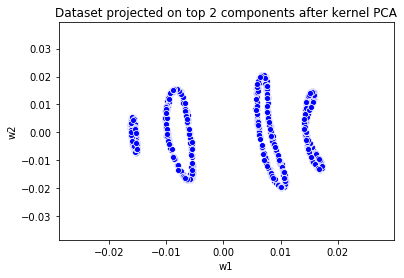

In [40]:
alpha_rbf = np.empty([1000,1000])
for i in range(1000):
    alpha_rbf[:,i] = eigenvectors_kc_rbf[:,i]/np.power(1000*abs(eigenvalues_kc_rbf[i]),(1/2))

mapped_rbf=np.matmul(Kc_rbf,alpha_rbf)

sns.scatterplot(mapped_rbf[:,0],mapped_rbf[:,1],color='blue')
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Dataset projected on top 2 components after kernel PCA')

In [41]:
t=np.empty([1000,2])
t[:,0]=1
t[:,1]=0
mapped_rbf_s = np.empty([1000,2])
mapped_rbf_s[:,0] = mapped_rbf[:,0]
mapped_rbf_s[:,1] = mapped_rbf[:,1]
mapped_fin = mapped_rbf_s*t
mapped_fin

array([[-0.01606971,  0.        ],
       [-0.01614469,  0.        ],
       [-0.01527426, -0.        ],
       ...,
       [ 0.0147756 , -0.        ],
       [ 0.0167343 , -0.        ],
       [ 0.016633  , -0.        ]])

Text(0, 0.5, 'w2')

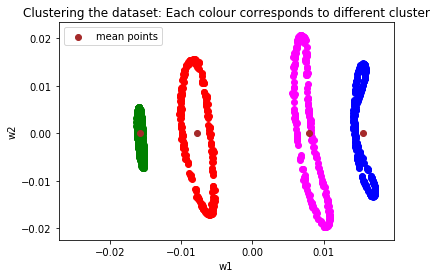

In [42]:
mean_first_rbf1=assumemean(mapped_fin,1)
iter_to_converge_rbf1=final(mapped_fin,mean_first_rbf1)[0]
z_final_rbf1=final(mapped_fin,mean_first_rbf1)[1]
mean_final_rbf1=np.array(final(mapped_fin,mean_first_rbf1)[2])
plotting(mapped_rbf,z_final_rbf1,4,mean_final_rbf1)
plt.xlabel('w1')
plt.ylabel('w2')

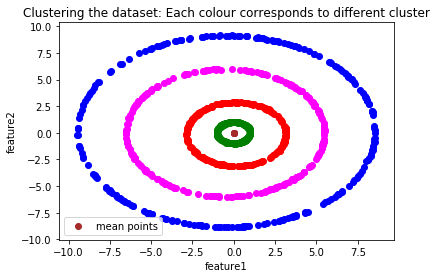

In [43]:
plotting(data,z_final_rbf1,4,mean_final_rbf1)

### (2) iv. Instead of using the method suggested by spectral clustering to map eigenvectors to cluster assignments, use the following method: Assign data point i to cluster l whenever l = arg max(j=1,2,..k) vij where vj ∈ Rn is the eigenvector of the Kernel matrix associated with the j-th largest eigenvalue. How does this mapping perform for this dataset?. Explain your insights


In [44]:
l=[]
for i in range(len(data)):
    l.append(list(H_mat[i,:]).index(max(H_mat[i,:]))+1)

In [45]:
z=pd.DataFrame(l)
z.columns = ['cluster']
df = pd.concat([df,z],axis=1)
df

,x,y,cluster
0,0.14300,0.98493,11
1,-0.30467,0.98562,11
2,0.46625,-0.84003,6
3,0.94847,0.37222,7
4,-0.96871,-0.26697,8
...,...,...,...
995,4.48210,-7.40030,11
996,-3.49630,8.63860,11
997,6.10620,-5.98640,9
998,-7.40940,-5.52050,7


Text(0.5, 1.0, 'Clustering the dataset: Each colour corresponds to different cluster')

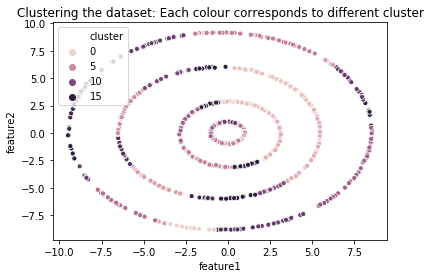

In [46]:
sns.scatterplot(x=df.x,y = df.y,hue = df.cluster, s = 25)
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('Clustering the dataset: Each colour corresponds to different cluster')